# Running YOLO11 Locally

In this notebook, I walk you through how you can run the [YOLO11](https://docs.ultralytics.com/models/yolo11/) Object Detection Model Locally. I cover detection on an image and also a video sequence. I used the [Ultralytics](https://docs.ultralytics.com/tasks/detect/#predict) Library to run the YOLO model.

## Install Libraries

In [46]:
%pip install ultralytics --quiet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\hulela_blogs\september_2025\YOLO_object_detection\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Import YOLO from Ultralytics

In [47]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

## Load YOLO Model

In [48]:
# Load a model
model = YOLO("yolo11n.pt")  # load an official model

## Perform Detection on Image

In [49]:
image_name = "car_girls.jpg"

# Predict with the model
results = model(
    f"tasks/detection/{image_name}",
    save=True,                   # enable saving
    project="tasks/detection/outputs",   # main directory
)


image 1/1 c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\hulela_blogs\september_2025\YOLO_object_detection\tasks\detection\car_girls.jpg: 448x640 2 persons, 1 car, 2 backpacks, 1 handbag, 116.8ms
Speed: 13.8ms preprocess, 116.8ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to C:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\hulela_blogs\september_2025\YOLO_object_detection\tasks\detection\outputs\predict


## Process Image Results

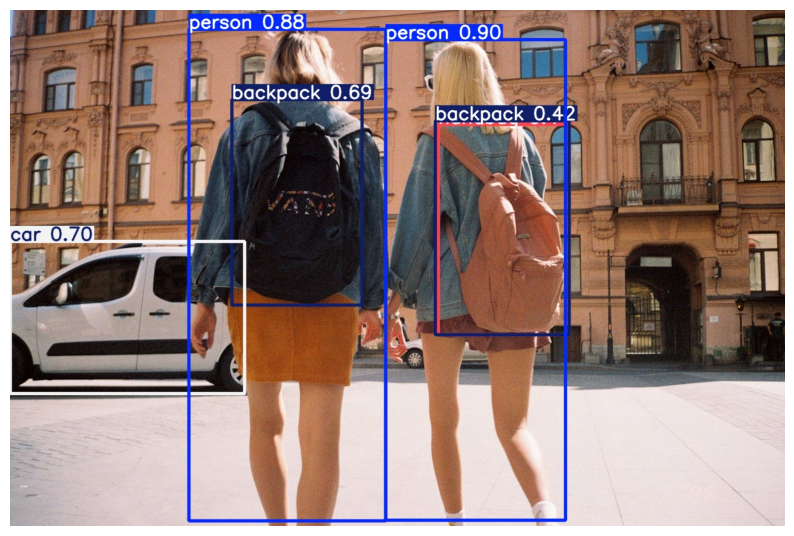

In [50]:
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    
    saved_path = os.path.join(result.save_dir, image_name)    # path to the saved image

    # Load image with matplotlib
    img = mpimg.imread(saved_path)

    # Show image
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

## Detect on a Video

In [51]:
video_name = "city_people.mp4"

# Predict with the model
results = model(
    f"tasks/detection/{video_name}",
    save=True,                   # enable saving
    project="tasks/detection/outputs",   # main directory
)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1047) c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\hulela_blogs\september_2025\YOLO_object_detection\tasks\detection\city_people.mp4: 384x640 12 persons, 1 dog, 1 chair, 72.0ms
video 1/1 (frame 2/1047) c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\hulela_blogs\september_2025\YOLO_object_detection\tasks\detection\city_people.mp4: 384x640 12 persons, 1 chair, 99.7ms
video 1/1 (fra

## Process Video Results

In [53]:
# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box